In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

# load dataset
breast_cancer = load_breast_cancer()

# konversi ke DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# tambahkan kolom target
df['target'] = breast_cancer.target

# ubah nilai target menjadi nama kelas
df['class'] = df['target'].apply(lambda x: breast_cancer.target_names[x])

# lihat 5 baris teratas dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0          

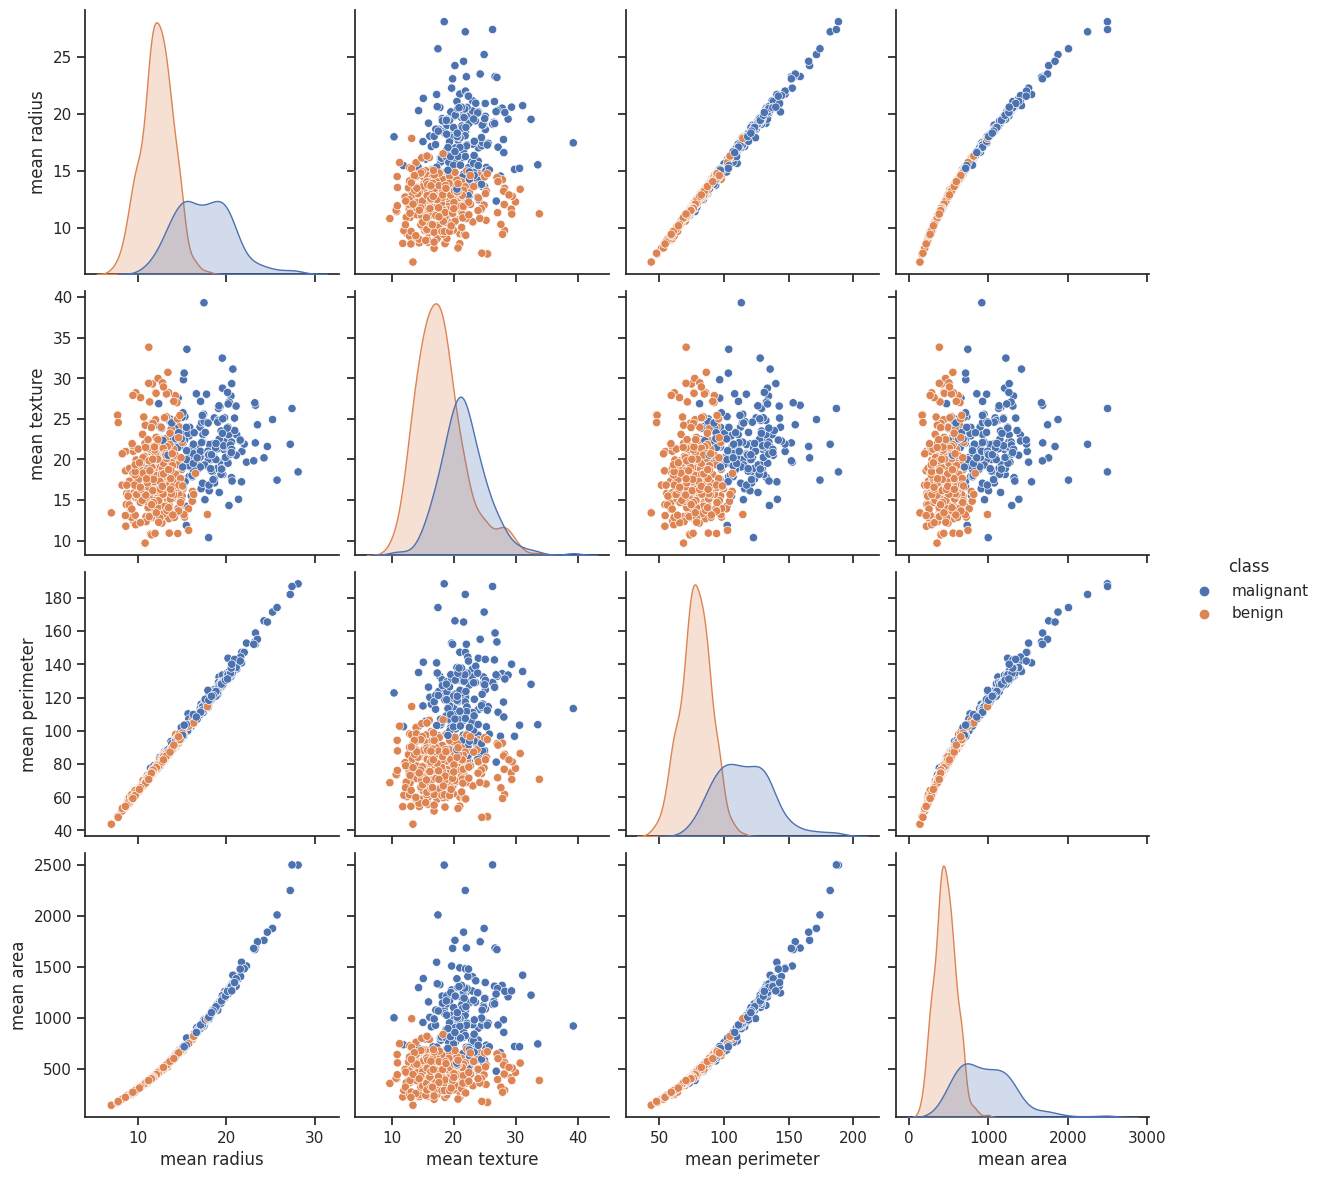

In [ ]:
# set tema dan gaya seaborn
sns.set_theme(style="ticks", color_codes=True)

# buat pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='class', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], height=3)

# tampilkan plot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       193
           1       0.92      0.92      0.92       320

    accuracy                           0.90       513
   macro avg       0.89      0.89      0.89       513
weighted avg       0.90      0.90      0.90       513



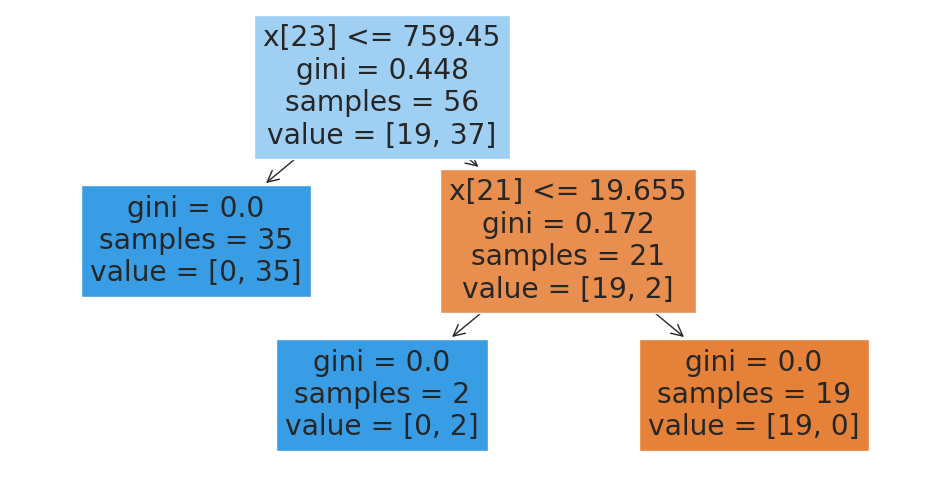

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       193
           1       0.92      0.97      0.94       320

    accuracy                           0.93       513
   macro avg       0.93      0.91      0.92       513
weighted avg       0.93      0.93      0.93       513



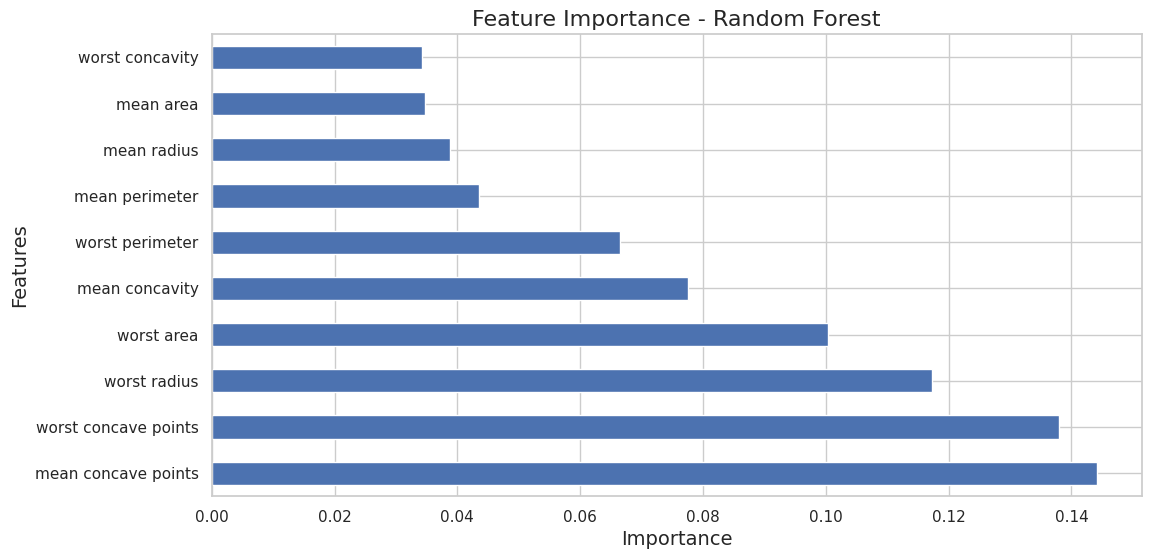

Self-Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       320

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513



In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

# split into labeled and unlabeled data
labeled_idx = np.random.choice(np.arange(len(y)), size=int(0.1*len(y)), replace=False)
unlabeled_idx = np.array([idx for idx in range(len(y)) if idx not in labeled_idx])

X_labeled, y_labeled = X[labeled_idx], y[labeled_idx]
X_unlabeled = X[unlabeled_idx]

# create models
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
self_training = SelfTrainingClassifier(DecisionTreeClassifier(random_state=42), threshold=0.92)

# train models
dtc.fit(X_labeled, y_labeled)
rfc.fit(X_labeled, y_labeled)
self_training.fit(X, y)

# evaluate models
print('Decision Tree Classification Report:')
print(classification_report(y[unlabeled_idx], dtc.predict(X_unlabeled)))

# plot decision tree
plt.figure(figsize=(12,6))
plot_tree(dtc, filled=True)
plt.show()

# evaluate models
print('Random Forest Classification Report:')
print(classification_report(y[unlabeled_idx], rfc.predict(X_unlabeled)))

# plot feature importance for random forest
plt.figure(figsize=(12,6))
feat_importances = pd.Series(rf.feature_importances_, index=data.feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

print('Self-Training Classification Report:')
print(classification_report(y[unlabeled_idx], self_training.predict(X_unlabeled)))




